<a href="https://colab.research.google.com/github/bkim2210/Diabetes-Symptoms/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Description of Dataset**
The dataset used in our model is a collection of records from 520 patients at the Sylhet Diabetes Hospital in Syhlet, Bangledesh. Data was collected from a questionaire approved and administered by doctors at the hospital. In each patient record, indications were made on whether or not the patient had a list of symptoms and also whether or not the patient has or does not have diabetes. 

### **Prescription of Variables**
1. **Age** - Patients age
2. **Sex**- Is the patient Male or Female
3. **Polyuria** - Yes or No does the patient have large amounts of dilute urine
4. **Polydipsia** - Yes or No does the patient have abnormally high levels of thirst
5. **Sudden Weight Loss** 'SWL' - Yes or No has the patient experienced sudden weight loss
6. **Weakness** 'WKN' - Yes or No has the patient felt abnormally weak
7. **Polyphagia** - Yes or No does the patient have excess hunger
8. **Genital thrush** 'GTH'- Yes or No does the patient have genital thrush, a genital yeast infection found in both men and women
9. **Visual Blurring** 'VBL' - Yes or No does the patient experience less sharpness in vision
10. **Itching** - Yes or No does the patient experience excess itching
11. **Irritability** - Yes or No does the patient experience irritability 
12. **Delayed Healing** 'DHE' - Yes or No does the patient experieince delayed healing 
13. **Partial Paresis** 'PPE' - Yes or No has the patient lost feeling or control in their muscles
14. **Muscle Stiffness** 'MST' - Yes or No does the patient have muscle stiffness
15. **Alopecia** - Yes or No has the patient experienced baldness in spots where hair normall grows
16. **Obesity** - Yes or No is the patient obese 
17. **Class** 1.Positive, 2.Negative - does the patient have diabetes

### **Variable Analysis**
1. Some variables describe symptoms that are distinct medical symptoms like, for example, Polyuria and Obesity. Other variables are more subjective symptoms like itchiness and muscle stiffness. 
2. All varaibles besides age and sex are "Yes or No" questions. 

### **Target Audience**
Our target audience is a board of Physicians in Bangledesh who sit on the countries National Public Health Committee.


### **Goal**
Our goal is to build a model that accurately predicts an individual's risk factor for diabetes to aid in early detection of diabetes in the public. The model can be used in public health screenings to identify at risk individuals. Early detection of diabetes is critical for helping keep those with diabetes healthy. Individuals made aware with early detection can lead healthier lives with the disease and avoid blindness, amputations, heart disease, stroke, and kidney failure. 

In [ ]:
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all"
!pip -q install -U statsmodels > log.txt   # ensures no FutureWarnings from statsmodels

import numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy, seaborn as sns, statsmodels.api as sm, pprint
import sklearn, platform, matplotlib, datetime
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
%matplotlib inline

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [ ]:
df.rename(columns={'sudden weight loss':'SWL','weakness':'WKN','Genital thrush':'GTH','visual blurring':'VBL','delayed healing':'DHE','partial paresis':'PPA','muscle stiffness':'MST'},inplace=True)
df.head()

,Age,Gender,Polyuria,Polydipsia,SWL,WKN,Polyphagia,GTH,VBL,Itching,Irritability,DHE,PPA,MST,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### EDA

#### Check missing values

In [ ]:
eda = df.copy(deep=True)
eda.info() #.info confirmed there are no null values in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           520 non-null    int64 
 1   Gender        520 non-null    object
 2   Polyuria      520 non-null    object
 3   Polydipsia    520 non-null    object
 4   SWL           520 non-null    object
 5   WKN           520 non-null    object
 6   Polyphagia    520 non-null    object
 7   GTH           520 non-null    object
 8   VBL           520 non-null    object
 9   Itching       520 non-null    object
 10  Irritability  520 non-null    object
 11  DHE           520 non-null    object
 12  PPA           520 non-null    object
 13  MST           520 non-null    object
 14  Alopecia      520 non-null    object
 15  Obesity       520 non-null    object
 16  class         520 non-null    object
dtypes: int64(1), object(16)
memory usage: 69.2+ KB


#### Check target imbalance

Positive    320
Negative    200
Name: class, dtype: Int64


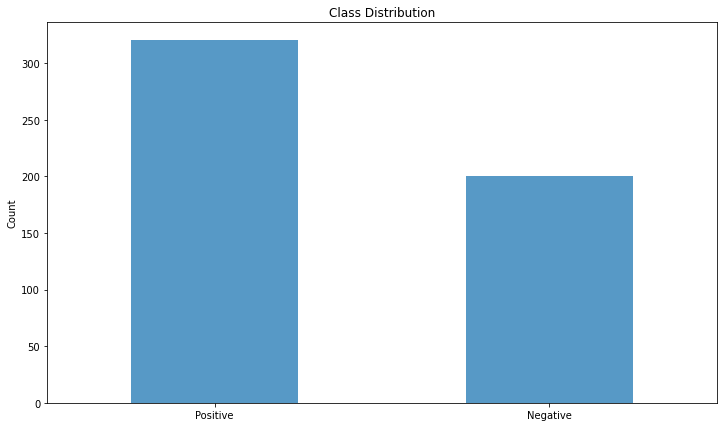

In [ ]:
fig = plt.figure(figsize=(12, 7))
eda[eda.columns.difference(['Age'])] = eda[eda.columns.difference(['Age'])].astype('string')
print(eda['class'].value_counts())
ax = eda['class'].value_counts().plot(kind='bar', alpha=0.75, rot=0, title='Class Distribution')
_ = ax.set_ylabel('Count')

The target value is not too imbalance. There are 320 posititve cases and 200 negative cases

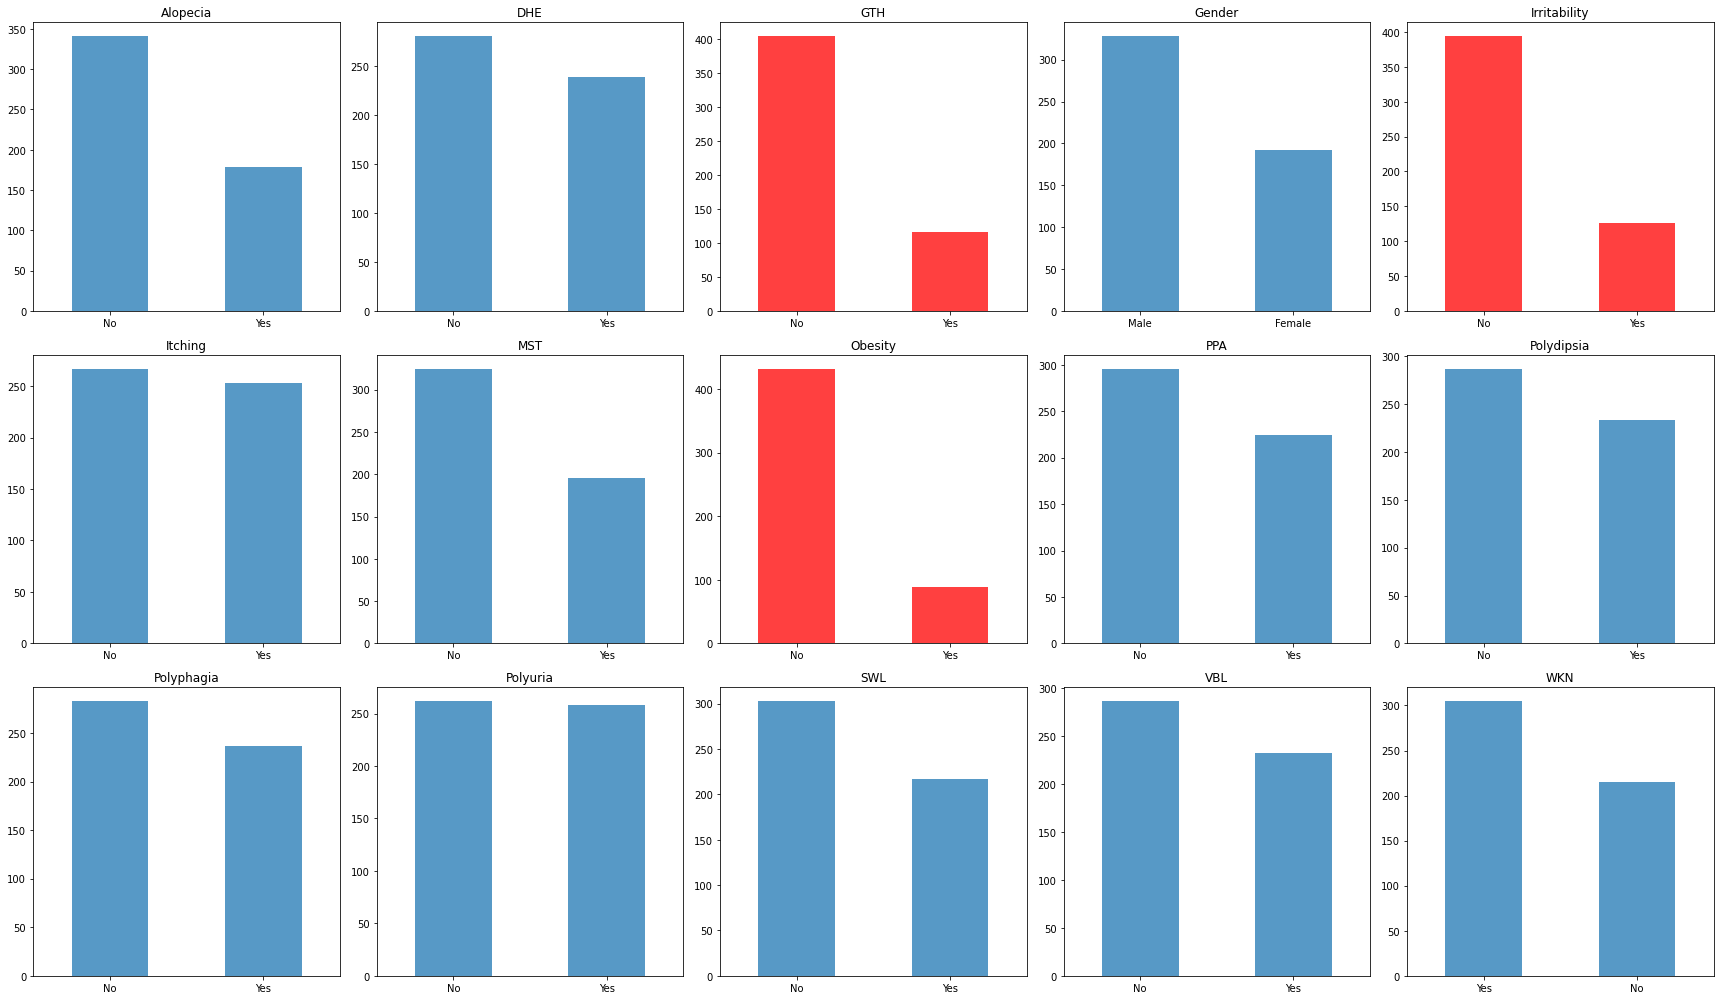

In [ ]:
fig = plt.figure(figsize=(24, 14))
for i, col_name in enumerate(eda.columns.difference(['Age', 'class'])):
    counts = eda[col_name].value_counts()
    temp = sorted(counts.to_list())
    ratio = temp[0]/temp[-1] 
    ax = fig.add_subplot(3,5,i+1)
    if ratio > 0.5: 
      _ = counts.plot(kind='bar', alpha=0.75, rot=0, title=col_name)
    else:
      _ = counts.plot(kind='bar', alpha=0.75, rot=0, color='red', title=col_name)

fig.tight_layout()

AS we can see, three attributes, GTH, Irritability and Obesity, are extreme imbalance. The balance ratios of the inbalances are less than 0.5.

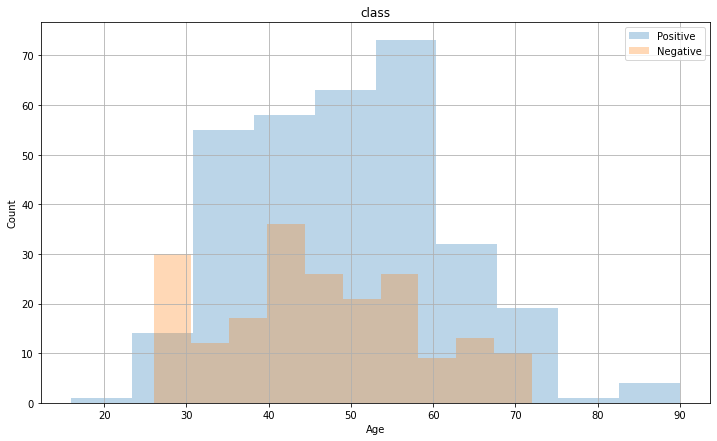

In [ ]:
fig = plt.figure(figsize=(12, 7))
col_name = 'class'
cate1, cate2 = eda[col_name].unique()
ax = eda[eda[col_name] == cate1]['Age'].hist(alpha=0.3, label=cate1)
_ = eda[eda[col_name] == cate2]['Age'].hist(alpha=0.3, label=cate2)
_ = ax.set_title(col_name)
_ = ax.set_xlabel('Age')
_ = ax.set_ylabel('Count')
_ = ax.legend(loc='upper right')

The shapes of age distributions of positive and negative are similar.

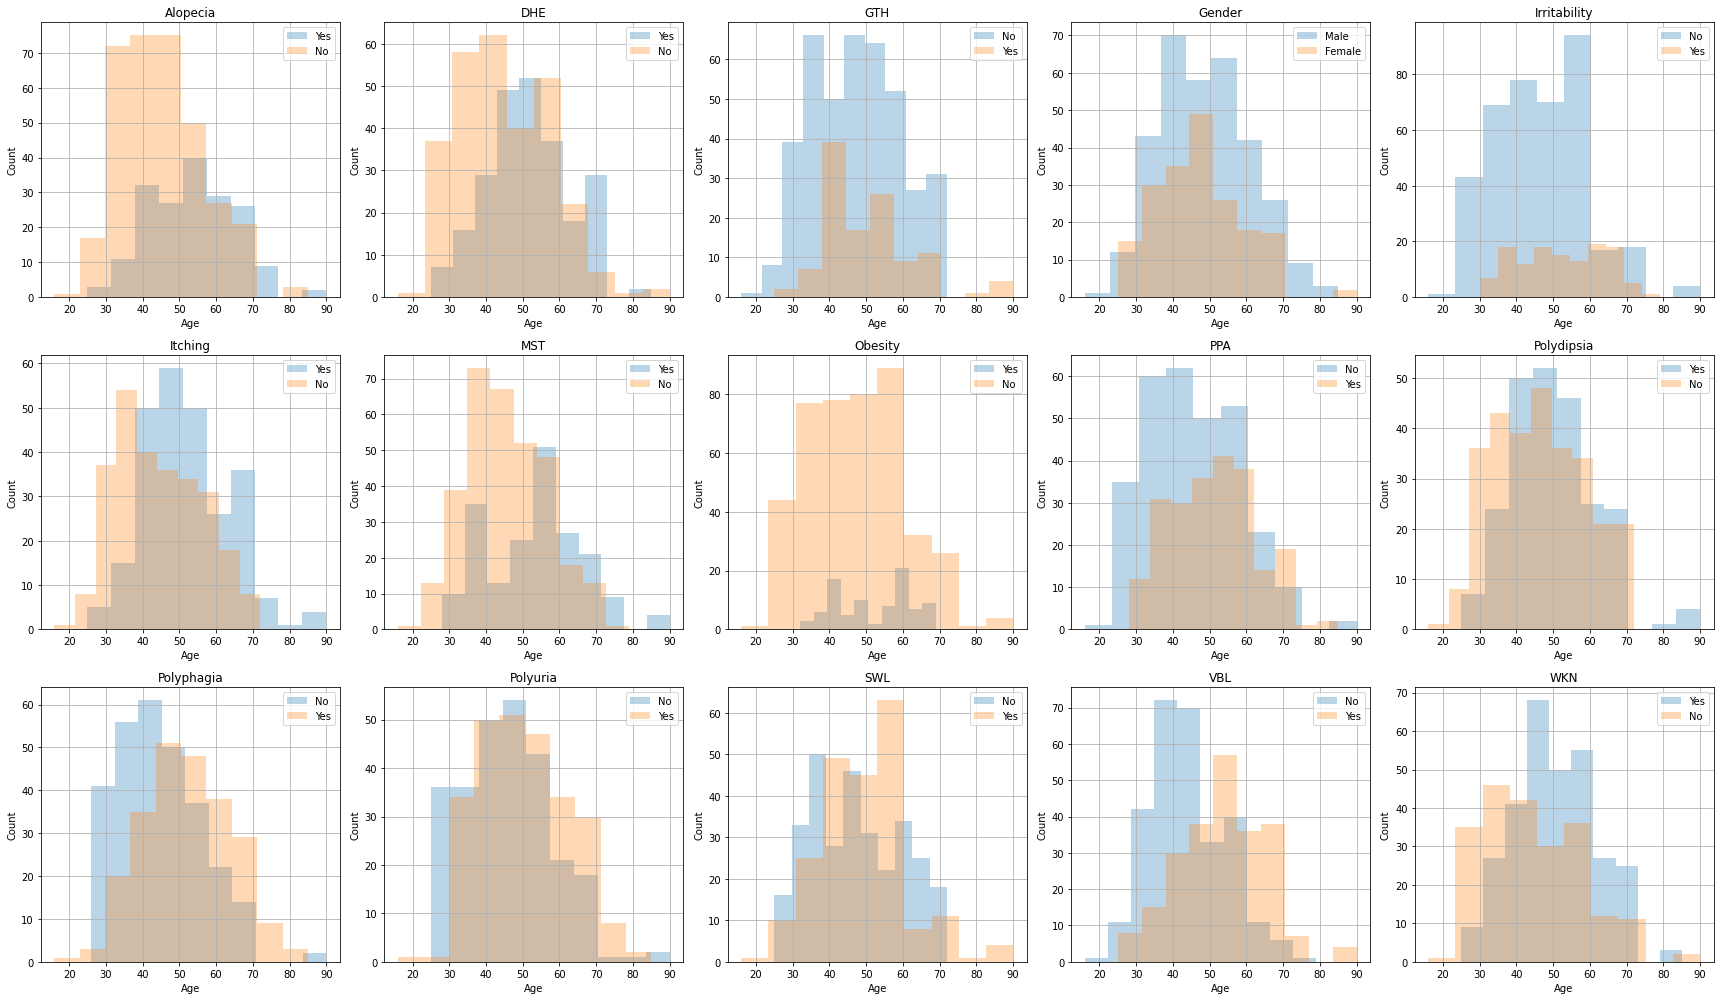

In [ ]:
fig = plt.figure(figsize=(24, 14))

for i, col_name in enumerate(eda.columns.difference(['Age', 'class'])):
    cate1, cate2 = eda[col_name].unique()
    ax = fig.add_subplot(3,5,i+1, )
    _ = eda[eda[col_name] == cate1]['Age'].hist(alpha=0.3, label=cate1)
    _ = eda[eda[col_name] == cate2]['Age'].hist(alpha=0.3, label=cate2)
    _ = ax.set_title(col_name)
    _ = ax.set_xlabel('Age')
    _ = ax.set_ylabel('Count')
    _ = ax.legend(loc='upper right')
fig.tight_layout()

1. The shapes of age distributions by class labels are similar
2. For extreme imbalance attributes [GTH, Irritability and Obesity], the distributions within each attribute are expected
3. The age of majority without Alopecia is between 30-50; the age of majority with Alopecia is between 50-60


In [ ]:
pearson_corr = eda.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
pearson_corr

,Age,Gender,Polyuria,Polydipsia,SWL,WKN,Polyphagia,GTH,VBL,Itching,Irritability,DHE,PPA,MST,Alopecia,Obesity,class
Age,1.000000,0.016483,-0.154313,0.174441,-0.166286,0.129442,-0.086470,-0.122024,-0.068784,-0.016944,0.008624,-0.000516,-0.181484,0.040275,-0.085853,0.220003,0.169469
Gender,0.016483,1.000000,0.268894,-0.312262,0.281840,-0.124490,0.219968,-0.208961,0.208092,-0.052496,0.013735,-0.101978,0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,-0.154313,0.268894,1.000000,-0.598609,0.447207,-0.263000,0.373873,0.087273,0.235095,-0.088289,0.237740,-0.149873,0.441664,-0.152938,0.144192,-0.126567,-0.665922
Polydipsia,0.174441,-0.312262,-0.598609,1.000000,-0.405965,0.332453,-0.316839,-0.028081,-0.331250,0.128716,-0.203446,0.115691,-0.442249,0.180723,-0.310964,0.098691,0.648734
SWL,-0.166286,0.281840,0.447207,-0.405965,1.000000,-0.282884,0.243511,0.089858,0.068754,0.004516,0.140340,-0.088140,0.264014,-0.109756,0.202727,-0.169294,-0.436568
WKN,0.129442,-0.124490,-0.263000,0.332453,-0.282884,1.000000,-0.180266,-0.027780,-0.301043,0.309440,-0.146698,0.335507,-0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,-0.086470,0.219968,0.373873,-0.316839,0.243511,-0.180266,1.000000,-0.063712,0.293545,-0.144390,0.239466,-0.263980,0.373569,-0.320031,0.053498,-0.029785,-0.342504
GTH,-0.122024,-0.208961,0.087273,-0.028081,0.089858,-0.027780,-0.063712,1.000000,-0.148408,-0.125336,0.160551,-0.136111,-0.195612,0.100188,-0.204847,-0.053828,-0.110288
VBL,-0.068784,0.208092,0.235095,-0.331250,0.068754,-0.301043,0.293545,-0.148408,1.000000,-0.291191,0.077095,-0.177767,0.364156,-0.412369,-0.014604,-0.109005,-0.251300
Itching,-0.016944,-0.052496,-0.088289,0.128716,0.004516,0.309440,-0.144390,-0.125336,-0.291191,1.000000,-0.114006,0.453316,-0.116669,0.215575,0.266506,0.001894,-0.013384


1. The strongest predictors are Polyuria and Polydipsia with abs pearson correlation > 0.6. 
2. The moderate predictors are Gender, SWL and PPA with abs pearson correlations in the bucket of [0.4, 0.5].
3. The rest are weak predictors.

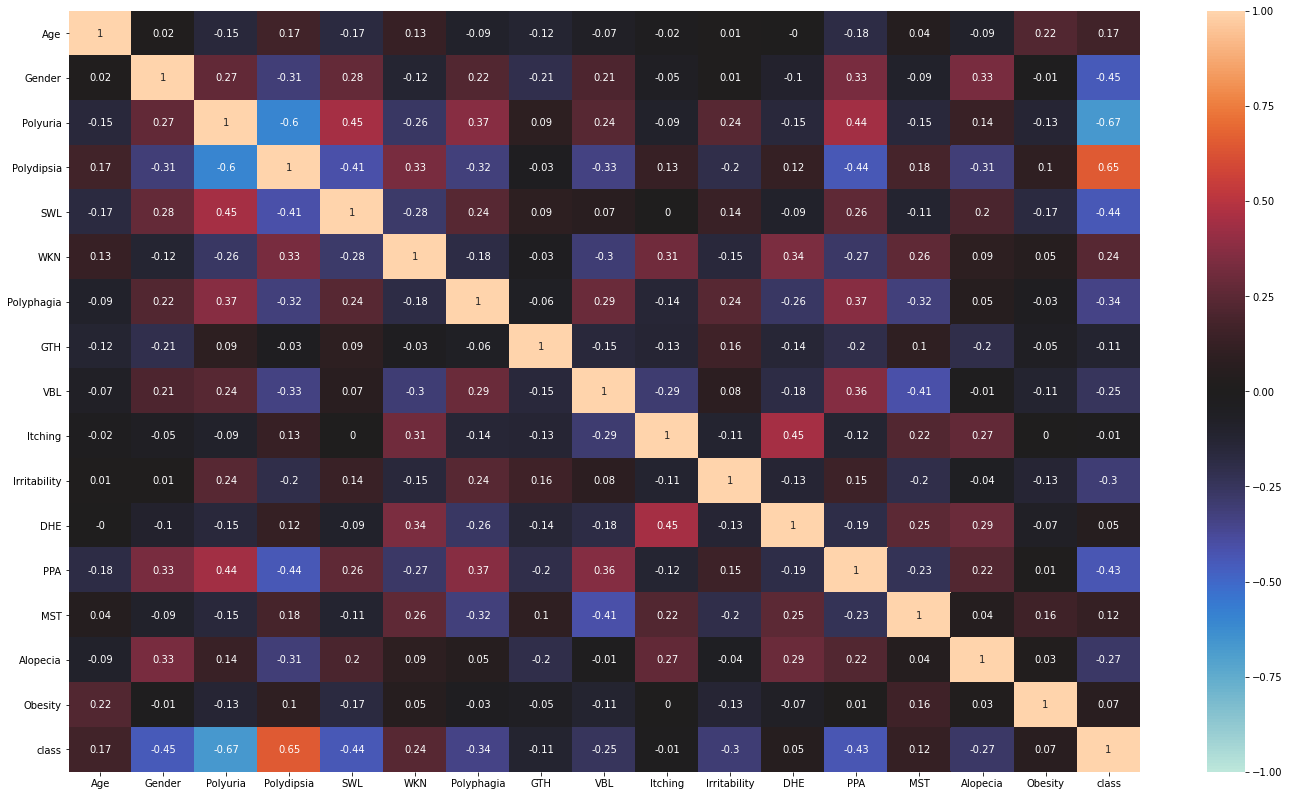

In [ ]:
fig = plt.figure(figsize=(24, 14))
ax = sns.heatmap(pearson_corr.round(2), annot=True, vmin=-1, vmax=1, center=0)

In [ ]:
df.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True) #0=No;1=Yes
df.replace(to_replace=['Male', 'Female'], value=[0, 1],inplace=True) #0=Male;1=Female
df.replace(to_replace=['Positive', 'Negative'], value=[0, 1],inplace=True) #0=Positive;1=Negative
df.head()

,Age,Gender,Polyuria,Polydipsia,SWL,WKN,Polyphagia,GTH,VBL,Itching,Irritability,DHE,PPA,MST,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0


In [ ]:
def describe(df):
    return pd.concat([df.describe().drop(['count']).T,
                      df.mad().rename('mad'),
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt'),
                      df.quantile().rename('IQR'),
                     ], axis=1).T

round(describe(df),2)

,Age,Gender,Polyuria,Polydipsia,SWL,WKN,Polyphagia,GTH,VBL,Itching,Irritability,DHE,PPA,MST,Alopecia,Obesity,class
mean,48.03,0.37,0.50,0.45,0.42,0.59,0.46,0.22,0.45,0.49,0.24,0.46,0.43,0.38,0.34,0.17,0.38
std,12.15,0.48,0.50,0.50,0.49,0.49,0.50,0.42,0.50,0.50,0.43,0.50,0.50,0.48,0.48,0.38,0.49
min,16.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,39.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,47.50,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,57.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00
max,90.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
mad,9.94,0.47,0.50,0.49,0.49,0.49,0.50,0.35,0.49,0.50,0.37,0.50,0.49,0.47,0.45,0.28,0.47
skew,0.33,0.54,0.02,0.21,0.34,-0.35,0.18,1.33,0.21,0.05,1.21,0.16,0.28,0.52,0.66,1.77,0.48
kurt,-0.19,-1.71,-2.01,-1.96,-1.89,-1.88,-1.98,-0.22,-1.96,-2.00,-0.55,-1.98,-1.93,-1.74,-1.57,1.14,-1.78


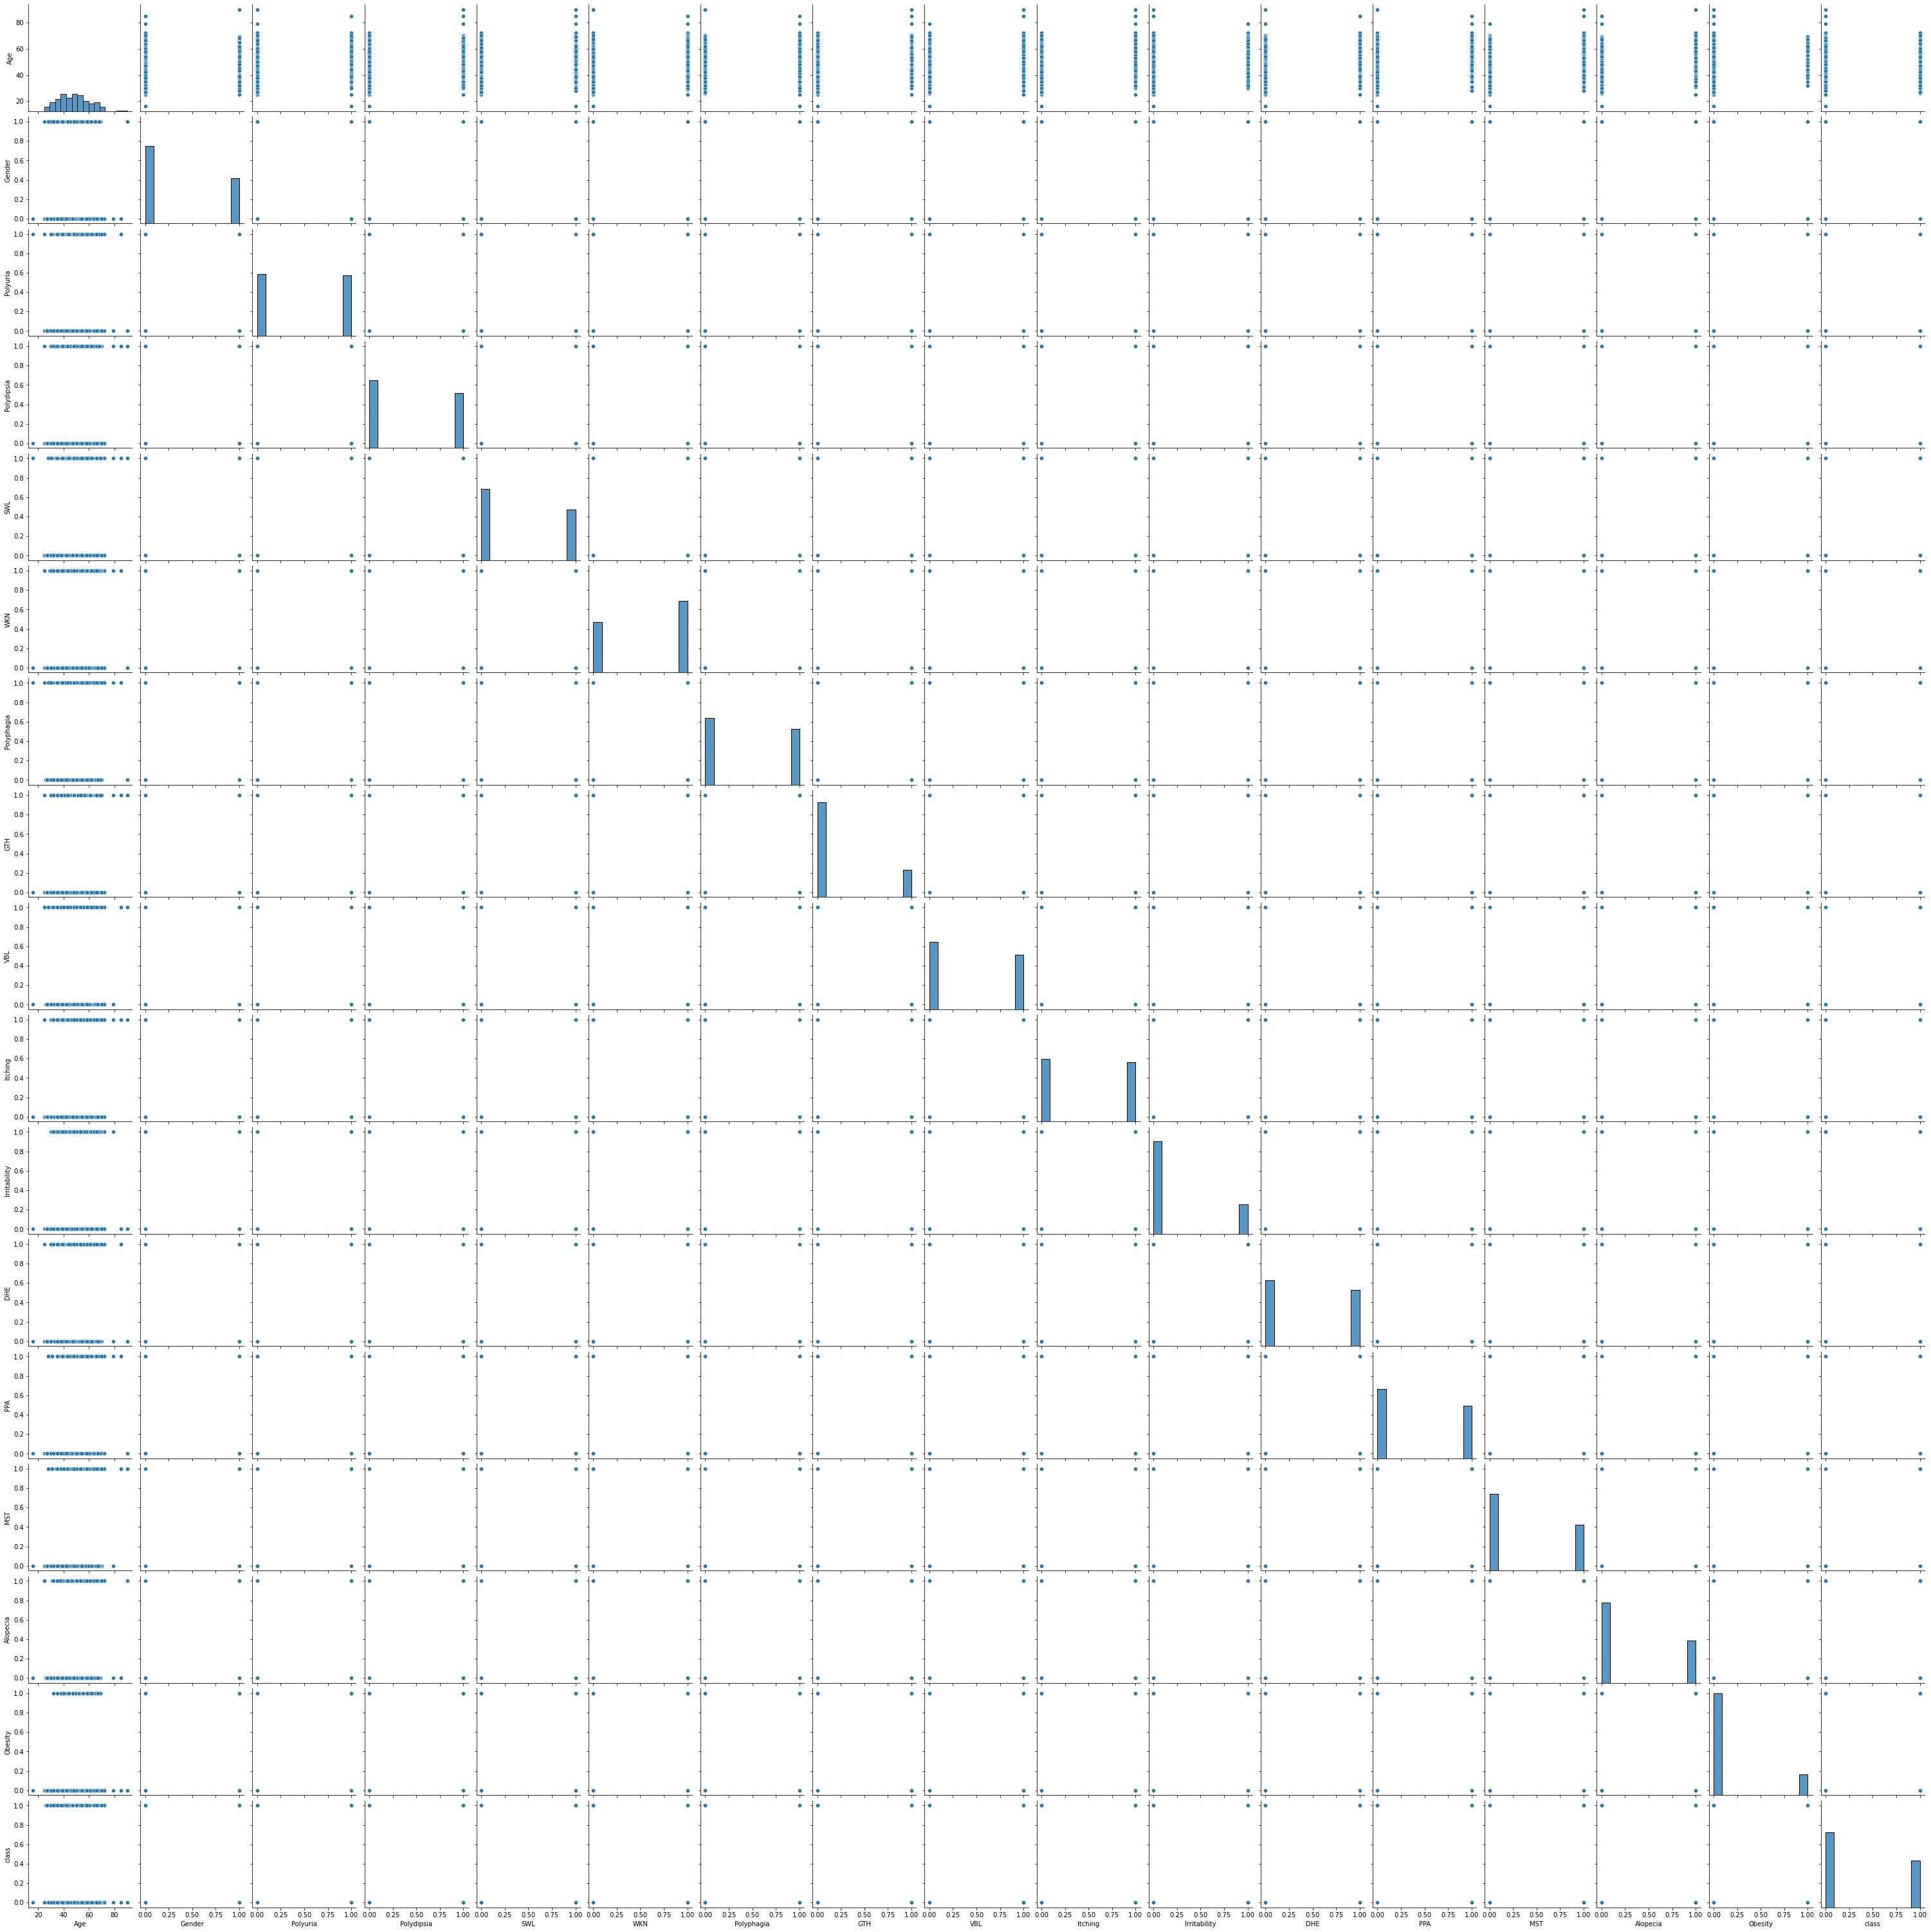

In [ ]:
sns.pairplot(df)

Build a Baseline Model

In [ ]:
df_0 = df.copy() #Copydata

In [ ]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           520 non-null    int64
 1   Gender        520 non-null    int64
 2   Polyuria      520 non-null    int64
 3   Polydipsia    520 non-null    int64
 4   SWL           520 non-null    int64
 5   WKN           520 non-null    int64
 6   Polyphagia    520 non-null    int64
 7   GTH           520 non-null    int64
 8   VBL           520 non-null    int64
 9   Itching       520 non-null    int64
 10  Irritability  520 non-null    int64
 11  DHE           520 non-null    int64
 12  PPA           520 non-null    int64
 13  MST           520 non-null    int64
 14  Alopecia      520 non-null    int64
 15  Obesity       520 non-null    int64
 16  class         520 non-null    int64
dtypes: int64(17)
memory usage: 69.2 KB


Step 1: Split data to train-test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
tX, vX, tY, vY = train_test_split(df_0.drop("class", axis=1), df_0['class'],\
                                                    test_size=0.3, random_state=0)

Step: 2 Run Logistic Regression

In [ ]:
logitmodel_0 = sm.Logit(tY, tX)

Step 3: Fit the logistic regression on the training set and print the result

In [ ]:
result = logitmodel_0.fit()

Optimization terminated successfully.
         Current function value: 0.165805
         Iterations 10


In [ ]:
print(result.summary(title = 'Baseline Model', alpha = .05))

                                Baseline Model                                
Dep. Variable:                  class   No. Observations:                  364
Model:                          Logit   Df Residuals:                      348
Method:                           MLE   Df Model:                           15
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.7502
Time:                        03:17:03   Log-Likelihood:                -60.353
converged:                       True   LL-Null:                       -241.56
Covariance Type:            nonrobust   LLR p-value:                 5.293e-68
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age              0.0872      0.015      5.941      0.000       0.058       0.116
Gender          -4.4376      0.721     -6.153      0.000      -5.851      -3.024
Polyuria        -4.4387      0.807     -5.50

In [ ]:
probabilities_0 = result.predict(vX)

In [ ]:
probabilities_0

422    0.011938
107    0.066849
253    0.000002
235    0.906210
311    0.980860
         ...   
52     0.000010
74     0.000057
26     0.431259
213    0.629239
4      0.000556
Length: 156, dtype: float64

Step 4: Make Prediction on the test set and calculate the accuracy score

In [ ]:
#Step 4: Make Prediction on the test set and calculate the accuracy score

In [ ]:
predicted_classes_0 = probabilities_0.map(lambda x: 1 if x> 0.40 else 0)

In [ ]:
predicted_classes_0

422    0
107    0
253    0
235    1
311    1
      ..
52     0
74     0
26     1
213    1
4      0
Length: 156, dtype: int64

In [ ]:
accuracy_0 = sum(predicted_classes_0 == vY) / len (vY)

In [ ]:
accuracy_0

0.9230769230769231

In [ ]:
auc_0= roc_auc_score(vY, probabilities_0)

In [ ]:
auc_0

0.9770075497597804

In [ ]:
confusion_matrix_0 = confusion_matrix(vY, predicted_classes_0)

In [ ]:
confusion_matrix_0

array([[86,  8],
       [ 4, 58]])

Text(0.5, 1.0, 'Receiver Operating Characteristic')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

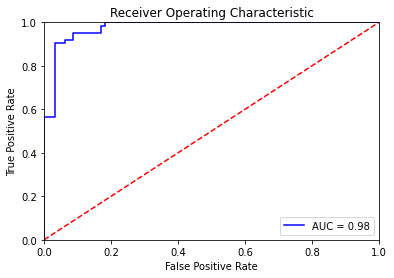

In [ ]:
fpr, tpr, threshold = roc_curve(vY, probabilities_0)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_0)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Improving the Baseline Model

Step 1: Create new dataframe df_1 from base model by dropping Sudden Weight Loss (SWL)

In [ ]:
df_1 = df_0.copy()

In [ ]:
df_1= df_1.drop(columns ='SWL') # Drop swl

In [ ]:
df_1.info() #check if SWL is dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           520 non-null    int64
 1   Gender        520 non-null    int64
 2   Polyuria      520 non-null    int64
 3   Polydipsia    520 non-null    int64
 4   WKN           520 non-null    int64
 5   Polyphagia    520 non-null    int64
 6   GTH           520 non-null    int64
 7   VBL           520 non-null    int64
 8   Itching       520 non-null    int64
 9   Irritability  520 non-null    int64
 10  DHE           520 non-null    int64
 11  PPA           520 non-null    int64
 12  MST           520 non-null    int64
 13  Alopecia      520 non-null    int64
 14  Obesity       520 non-null    int64
 15  class         520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB


In [ ]:
tX, vX, tY, vY = train_test_split(df_1.drop("class", axis=1), df_1['class'],\
                                                    test_size=0.3, random_state=0)

In [ ]:
logitmodel_1 = sm.Logit(tY, tX).fit()

Optimization terminated successfully.
         Current function value: 0.166135
         Iterations 10


In [ ]:
print(logitmodel_1.summary(title = 'Improve Baseline Model by Dropping SWL', alpha = .05))

                    Improve Baseline Model by Dropping SWL                    
Dep. Variable:                  class   No. Observations:                  364
Model:                          Logit   Df Residuals:                      349
Method:                           MLE   Df Model:                           14
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.7497
Time:                        03:17:04   Log-Likelihood:                -60.473
converged:                       True   LL-Null:                       -241.56
Covariance Type:            nonrobust   LLR p-value:                 1.145e-68
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age              0.0862      0.015      5.934      0.000       0.058       0.115
Gender          -4.4718      0.717     -6.233      0.000      -5.878      -3.066
Polyuria        -4.5354      0.791     -5.73

In [ ]:
probabilities_1 = logitmodel_1.predict(vX)

In [ ]:
probabilities_1

422    0.010071
107    0.070881
253    0.000002
235    0.903997
311    0.975656
         ...   
52     0.000011
74     0.000054
26     0.414899
213    0.579672
4      0.000636
Length: 156, dtype: float64

In [ ]:
predicted_classes_1 = probabilities_1.map(lambda x: 1 if x> 0.40 else 0)

In [ ]:
predicted_classes_1

422    0
107    0
253    0
235    1
311    1
      ..
52     0
74     0
26     1
213    1
4      0
Length: 156, dtype: int64

In [ ]:
accuracy_1 = sum(predicted_classes_1 == vY) / len (vY)

In [ ]:
accuracy_1

0.9294871794871795

In [ ]:
confusion_matrix_1 = confusion_matrix(vY, predicted_classes_1)

In [ ]:
confusion_matrix_1

array([[87,  7],
       [ 4, 58]])

In [ ]:
auc_1= roc_auc_score(vY, probabilities_1)

In [ ]:
auc_1

0.9759780370624571

Text(0.5, 1.0, 'Receiver Operating Characteristic')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

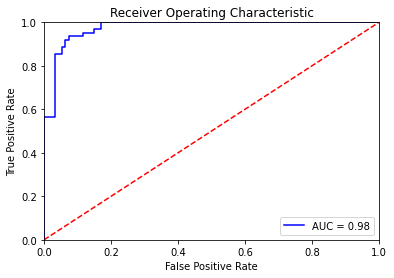

In [ ]:
fpr, tpr, threshold = roc_curve(vY, probabilities_1)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

1. The accuracy of model improved from 0.9423076923076923 to 0.9519230769230769
2. The area under the curve improved from 0.990625 to 0.991015625
3. The true positives in the confusion matrix improved from 37 to 38.


Improve the baseline model by dropping Sudden Weight Loss and Delayed Healing 

In [ ]:
df_2 = df_1.copy()

In [ ]:
df_2= df_2.drop(columns ='DHE') # Drop Delayed Healing

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Age           520 non-null    int64
 1   Gender        520 non-null    int64
 2   Polyuria      520 non-null    int64
 3   Polydipsia    520 non-null    int64
 4   WKN           520 non-null    int64
 5   Polyphagia    520 non-null    int64
 6   GTH           520 non-null    int64
 7   VBL           520 non-null    int64
 8   Itching       520 non-null    int64
 9   Irritability  520 non-null    int64
 10  PPA           520 non-null    int64
 11  MST           520 non-null    int64
 12  Alopecia      520 non-null    int64
 13  Obesity       520 non-null    int64
 14  class         520 non-null    int64
dtypes: int64(15)
memory usage: 61.1 KB


In [ ]:
tX, vX, tY, vY = train_test_split(df_2.drop("class", axis=1), df_2['class'],\
                                                    test_size=0.3, random_state=0)

In [ ]:
logitmodel_2 = sm.Logit(tY, tX).fit()

Optimization terminated successfully.
         Current function value: 0.166635
         Iterations 9


In [ ]:
print(logitmodel_2.summary(title = 'Improve Baseline Model by Dropping SWL and DHE', alpha = .05))

                Improve Baseline Model by Dropping SWL and DHE                
Dep. Variable:                  class   No. Observations:                  364
Model:                          Logit   Df Residuals:                      350
Method:                           MLE   Df Model:                           13
Date:                Wed, 17 Feb 2021   Pseudo R-squ.:                  0.7489
Time:                        03:17:04   Log-Likelihood:                -60.655
converged:                       True   LL-Null:                       -241.56
Covariance Type:            nonrobust   LLR p-value:                 2.531e-69
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age              0.0867      0.015      5.937      0.000       0.058       0.115
Gender          -4.5005      0.716     -6.289      0.000      -5.903      -3.098
Polyuria        -4.5576      0.795     -5.73

In [ ]:
probabilities_2 = logitmodel_2.predict(vX)

In [ ]:
probabilities_2

422    0.007902
107    0.051144
253    0.000002
235    0.905119
311    0.978457
         ...   
52     0.000008
74     0.000036
26     0.431372
213    0.577378
4      0.000522
Length: 156, dtype: float64

In [ ]:
predicted_classes_2 = probabilities_2.map(lambda x: 1 if x> 0.40 else 0)

In [ ]:
predicted_classes_2

422    0
107    0
253    0
235    1
311    1
      ..
52     0
74     0
26     1
213    1
4      0
Length: 156, dtype: int64

In [ ]:
accuracy_2 = sum(predicted_classes_2 == vY) / len (vY)

In [ ]:
accuracy_2

0.9230769230769231

In [ ]:
confusion_matrix_2 = confusion_matrix(vY, predicted_classes_2)

In [ ]:
confusion_matrix_2

array([[86,  8],
       [ 4, 58]])

In [ ]:
auc_2= roc_auc_score(vY, probabilities_2)

In [ ]:
auc_2

0.9756348661633495

Text(0.5, 1.0, 'Receiver Operating Characteristic')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

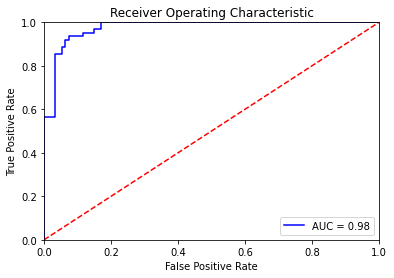

In [ ]:
fpr, tpr, threshold = roc_curve(vY, probabilities_1)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

There was not any significant change in the accuracy score, confusion matrix and auc by dropping Delayed Healing feature.

BaseLine Model using Tree Regression

In [ ]:
dfT0 = df.copy()

In [ ]:
Tree_tX, Tree_vX, Tree_tY, Tree_vY = train_test_split(dfT0.drop("class", axis=1), dfT0['class'],\
                                                    test_size=0.3, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_0 = DecisionTreeRegressor(random_state=0).fit(Tree_tX, Tree_tY)

In [ ]:
tree_0.score(Tree_vX,Tree_vY)

0.8661633493479753

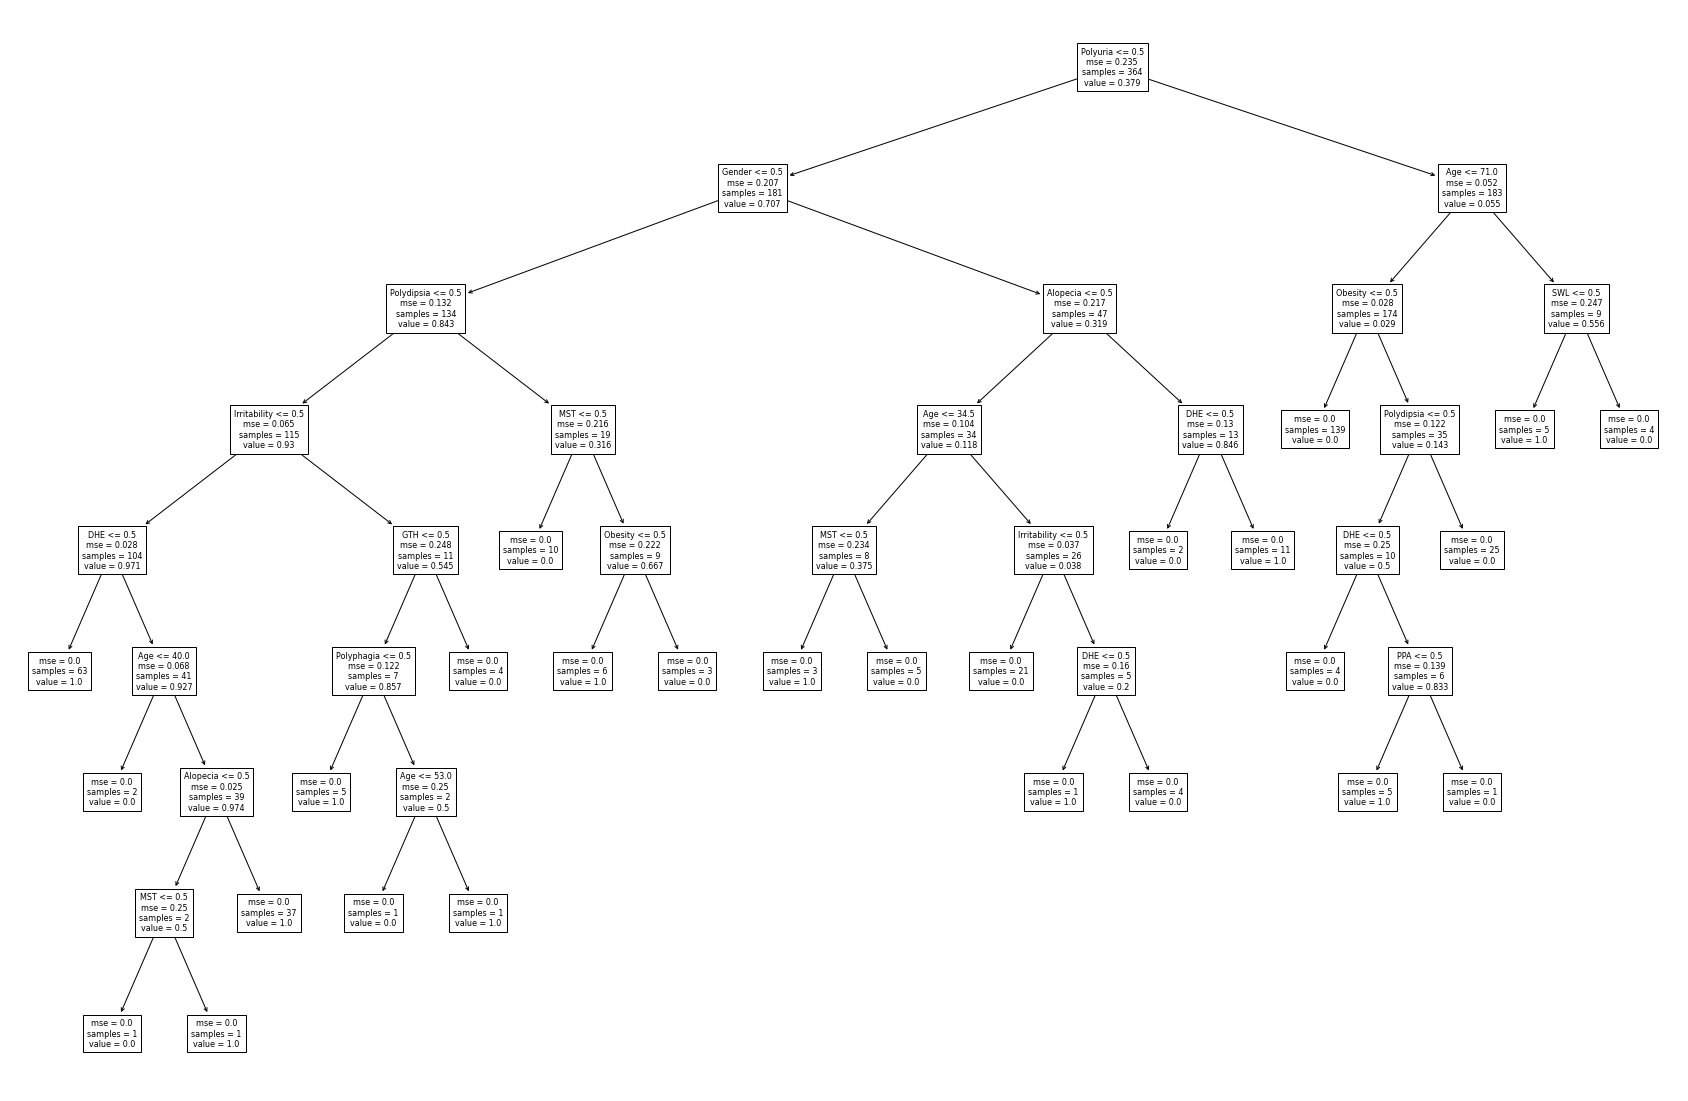

In [ ]:
fig, ax = plt.subplots(figsize=(30, 20))
tmp = sklearn.tree.plot_tree(tree_0, fontsize=8, ax=ax, feature_names=Tree_tX.columns);

In [ ]:
tree_0.get_depth()

8

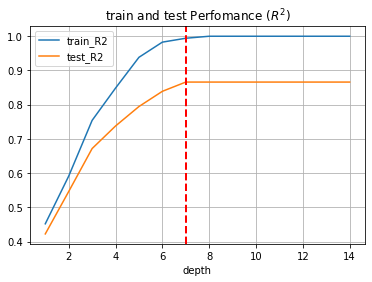

In [ ]:
res = []   #result
m = DecisionTreeRegressor(random_state=0)     # baseline model
for i in range(1,15):
    a = m.set_params(max_depth=i).fit(Tree_tX, Tree_tY)
    res.append((i, m.score(Tree_tX, Tree_tY), m.score(Tree_vX, Tree_vY)))
dfRes = pd.DataFrame(res, columns=['depth','train_R2','test_R2']).set_index('depth') 
a = dfRes.plot(grid=True, title='train and test Perfomance ($R^2$)')
# ?dt.score
plt.axvline(x=7, linewidth=2, linestyle='dashed', color='r')

In [ ]:
tree_depth_list= []
R2_train_list = []
R2_test_list = []

m = DecisionTreeRegressor(random_state=0)     # baseline model
for i in range(1,15):
    a = m.set_params(max_depth=i).fit(Tree_tX, Tree_tY)
   
    tree_depth_list.append(i)
    R2_train_list.append(m.score(Tree_tX,Tree_tY))
    R2_test_list.append(m.score(Tree_vX,Tree_vY))

In [ ]:
R2_dataframe =pd.DataFrame({'tree_depth':tree_depth_list, 'R2_train': R2_train_list, 'R2Test': R2_test_list})

In [ ]:
R2_dataframe

,tree_depth,R2_train,R2Test
0,1,0.452223,0.422699
1,2,0.591506,0.546549
2,3,0.754250,0.671999
3,4,0.848540,0.737859
4,5,0.938482,0.794735
5,6,0.982793,0.839150
6,7,0.994164,0.866163
7,8,1.000000,0.866163
8,9,1.000000,0.866163
9,10,1.000000,0.866163
